# CAR PRICE PREDICTION

**Import all the necessary packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
col=list(car_data.columns)

In [6]:
print("The Attributes of the Car Dataset:\n",col)

The Attributes of the Car Dataset:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [7]:
print("Number of rows and columns (row,column):\n",car_data.shape)

Number of rows and columns (row,column):
 (301, 9)


**Finding the Number of Duplicates and Null Values in the Given Dataset**

In [8]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There are **NO NULL** Values in the Given Dataset

In [9]:
duplicate_rows = car_data[car_data.duplicated()]
print(duplicate_rows)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


The Given Dataset has duplicate rows. So,remove one of them

In [10]:
car_data=car_data.drop_duplicates()

In [11]:
car_data.duplicated().sum()

0

Now there are no duplicates in the given Dataset as it has been removed.

**Finding the Data Types of the car_data.csv**

In [12]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

Here, in the given Dataset, four attributes namely: Car_Name, Fuel_Type,Selling_Type,Transmission are all of String/Object Data Type.Finding the Number of Unique values with total count.

In [13]:
car_data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [14]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [15]:
car_data['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [16]:
car_data['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

# DATA VISUALIZATION

<Axes: xlabel='Fuel_Type', ylabel='count'>

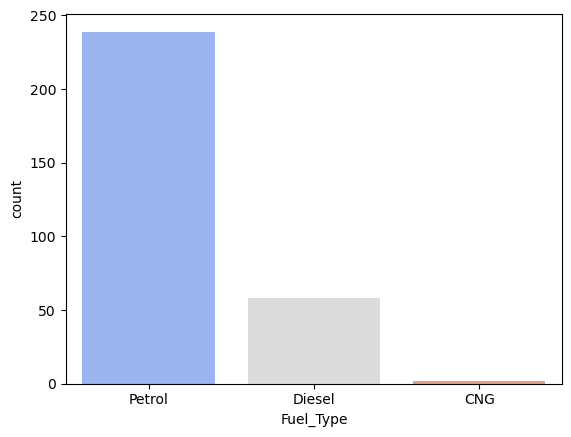

In [17]:
sns.countplot(x='Fuel_Type',data=car_data,palette='coolwarm')

<Axes: xlabel='Selling_type', ylabel='count'>

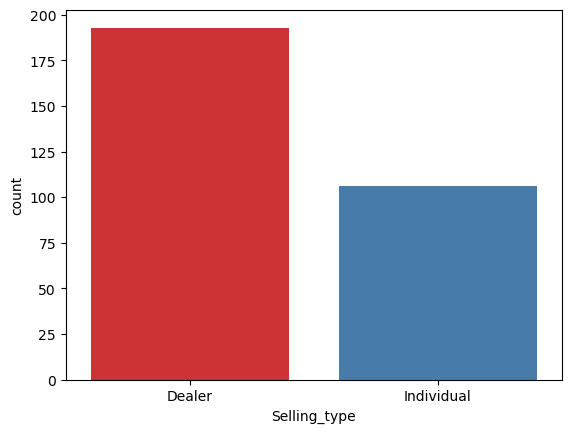

In [18]:
sns.countplot(x='Selling_type',data=car_data,palette='Set1')

<Axes: xlabel='Transmission', ylabel='count'>

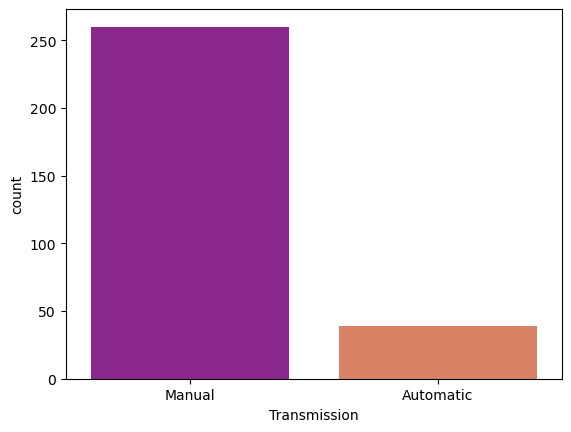

In [19]:
sns.countplot(x='Transmission',data=car_data,palette='plasma')

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

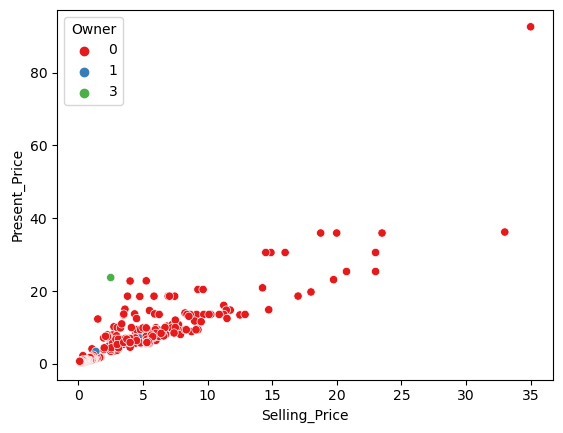

In [20]:
sns.scatterplot(data=car_data,x='Selling_Price',y='Present_Price',hue='Owner',palette='Set1')

<Axes: xlabel='Year', ylabel='Selling_Price'>

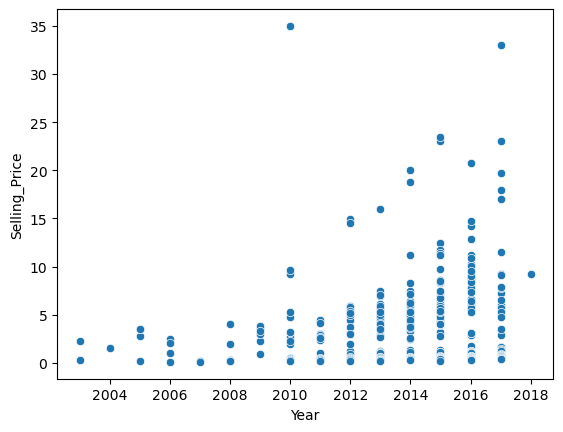

In [21]:
sns.scatterplot(data=car_data,y='Selling_Price',x='Year',palette='Set1')

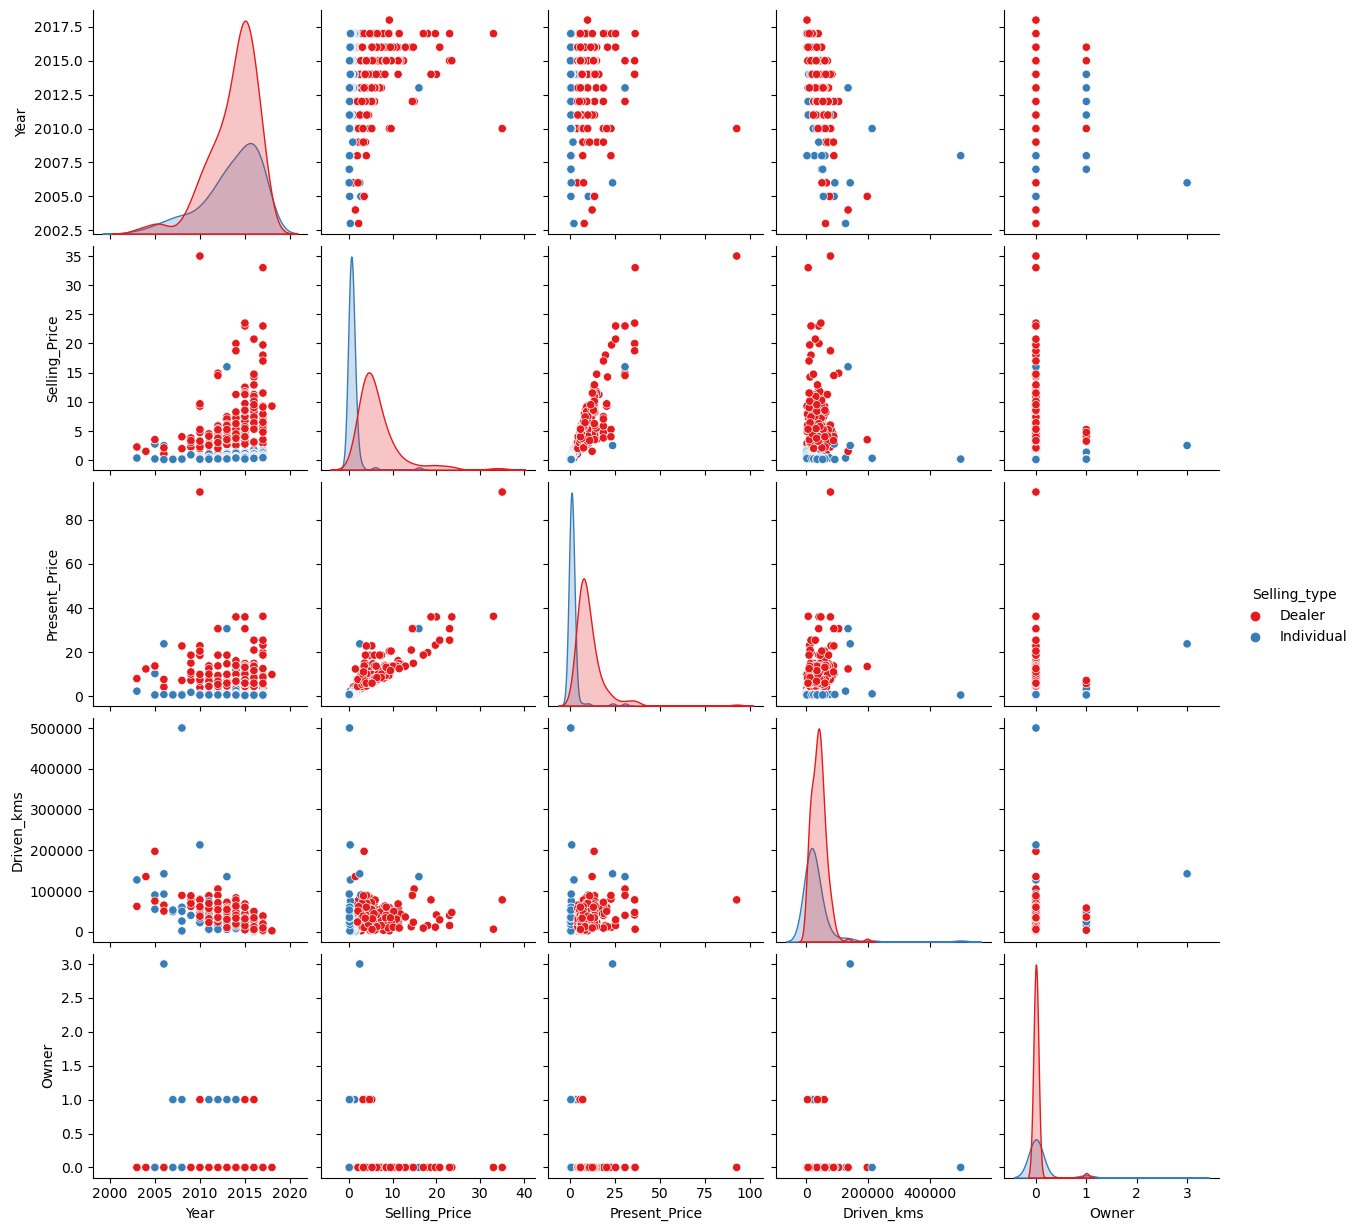

In [22]:
sns.pairplot(data=car_data,hue='Selling_type',palette='Set1')

**Finding Correlation between Numerical Values**

In [23]:
car=car_data.drop(columns=['Car_Name','Fuel_Type','Selling_type','Transmission'])
car.head(3)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0


The Above Dataset 'Car' consists of only numerical values excluding the other data types

In [24]:
car_correlation=car.corr()
car_correlation

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


<Axes: >

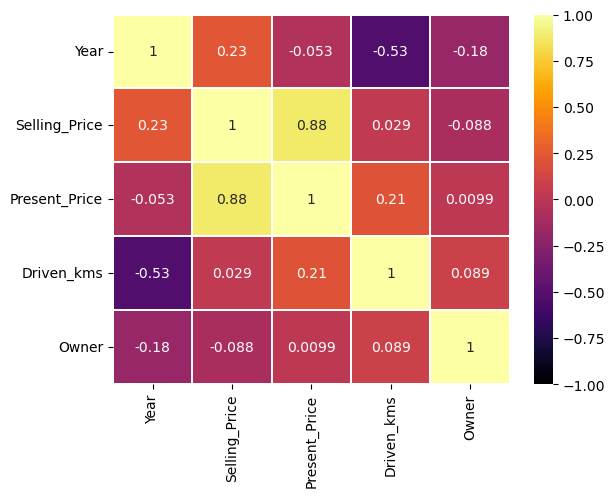

In [25]:
sns.heatmap(data=car_correlation,annot=True,cmap='inferno',linecolor='white',vmin=-1.0,linewidths=0.2)

In [26]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Converting Categorical Variables to Numerical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
car_data['Selling_type']=le.fit_transform(car_data['Selling_type'])
car_data['Fuel_Type']=le.fit_transform(car_data['Fuel_Type'])
car_data['Transmission']=le.fit_transform(car_data['Transmission'])

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


Car_Name attribute consists of too many values and cannot be converted into Numerical Values. So, it can be dropped

In [31]:
car_data.drop(columns='Car_Name',axis=1,inplace=True)

In [32]:
car_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


## Now Finding Correlation after converting categorical into numerical values

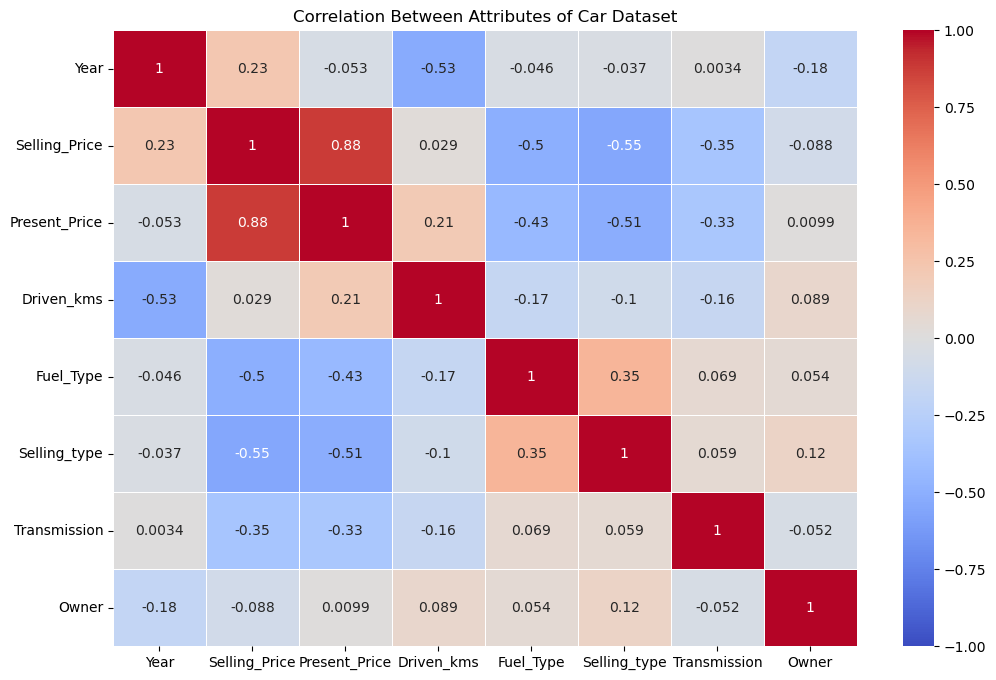

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(data=car_data.corr(),vmin=-1.0,cmap='coolwarm',annot=True,linewidths=0.5)
plt.title('Correlation Between Attributes of Car Dataset')
plt.show()

# MODEL TRAINING

**Feature Selection**

In [34]:
X=car_data.drop(columns=['Selling_Price'])
y=car_data['Selling_Price']

In [35]:
X.head()
X.columns

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=26)

Since it is a Prediction, We have to use Regression instead of Classification

# LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_pred = linear_regression_model.predict(X_test)
mae = mean_absolute_error(y_test, linear_regression_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.1444834651919322


MAE is in the same units as the target variable. If target variable is Selling_Price in dollars, then an MAE of 1.0973 dollars means that, on average, the predictions are off by about 1.0973 dollars

In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, linear_regression_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.0802409092756324


MSE of 2.2027 indicates the average squared error between model’s predictions and the actual values.

### **PREDICTING THE CAR PRICE FOR USER DEFINED VALUES**

In [40]:
def predict_selling_price(model, input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, drop_first=True).reindex(columns=X.columns, fill_value=0)
    prediction = model.predict(input_df)
    return prediction[0]

user_input = {
    'Year': int(input("Enter Year: ")),
    'Present_Price': float(input("Enter Present Price: ")),
    'Driven_kms': float(input("Enter Driven Kilometers: ")),
    'Fuel_Type': input("Enter Fuel Type (Petrol/Diesel/CNG): "),
    'Selling_type': input("Enter Selling Type (Dealer/Individual): "),
    'Transmission': input("Enter Transmission (Manual/Automatic): "),
    'Owner': int(input("Enter Number of Owners (0/1/2/3): "))
}


user_input['Fuel_Type'] = le.fit_transform([user_input['Fuel_Type']])[0]
user_input['Selling_type'] = le.fit_transform([user_input['Selling_type']])[0]
user_input['Transmission'] = le.fit_transform([user_input['Transmission']])[0]


predicted_price = predict_selling_price(linear_regression_model, user_input)
print(f"Predicted Selling Price: {predicted_price}")

Enter Year: 2010
Enter Present Price: 4.37
Enter Driven Kilometers: 0.4
Enter Fuel Type (Petrol/Diesel/CNG): Diesel
Enter Selling Type (Dealer/Individual): Dealer
Enter Transmission (Manual/Automatic): Automatic
Enter Number of Owners (0/1/2/3): 1
Predicted Selling Price: 6.841623323433851


#### DONE BY

MOHAMED SAMIR M